# Model

## Libraries

In [65]:
import pathlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

## Constants

In [66]:
DATA_DIR = pathlib.Path.cwd().parent / "data" / "deepconvchess-dataset" / "dataset"

## Create TensorFlow Dataset

In [70]:
# Dataset
image_data = []

for file in DATA_DIR.iterdir():
    if file.is_file() and file.name.endswith(".jpeg"):
        print("Processing %s" % file.name)
        
        # Open image of Chess board
        img = Image.open(DATA_DIR / file.name)
        IMG_WIDTH, IMG_HEIGHT = img.size

        # Crop each image into 64 sections, one for each tile on the board
        for i in range(8):
            for j in range(8):
                x = j * IMG_WIDTH // 8
                y = i * IMG_HEIGHT // 8
                img_crop = img.crop((x, y, x + IMG_WIDTH // 8, y + IMG_HEIGHT // 8))
                image_data.append((np.array(img_crop), "q"))

Processing 1N2r3_2q1ppkp_1p1p1np1_p1nP4_2P2P2_1P4P1_P2Q2BP_3RR1K1 b - - 0 21.jpeg
Processing 1q2r3_4ppkp_1p1p1np1_p1nP4_2P2P2_1P4P1_P2Q2BP_3RR1K1 w - - 0 22.jpeg
Processing 1q2r3_4ppkp_1p1p1np1_p1nP4_2PQ1P2_1P4P1_P5BP_3RR1K1 b - - 1 22.jpeg
Processing 1r1q1rk1_1ppb1pbp_p1np1np1_8_2PNP3_2N1BP2_PP1QB1PP_R4RK1 w - - 6 12.jpeg
Processing 1r1Q2k1_5ppp_2q1p3_1p6_2p2P2_P3P3_1Q4PP_1R4K1 b - - 0 27.jpeg
Processing 1r1qr3_1b1nppkp_pp1p2p1_2n5_2PNP3_1PN3P1_P2Q1PBP_3RR1K1 w - - 2 17.jpeg
Processing 1r1qr3_1b1nppkp_pp1p2p1_2n5_2PNPP2_1PN3P1_P2Q2BP_3RR1K1 b - - 0 17.jpeg
Processing 1r1qr3_1b2ppkp_pp1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_3RR1K1 b - - 1 16.jpeg
Processing 1r1qr3_1b2ppkp_pp1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_R3R1K1 w - - 0 16.jpeg
Processing 1r1qr3_pb2ppkp_1p1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_R3R1K1 b - - 0 15.jpeg
Processing 1r1qr3_pb2ppkp_1p1p1np1_2n5_2PNP3_2N3P1_PP1Q1PBP_R3R1K1 w - - 3 15.jpeg
Processing 1r2r3_1bqnppkp_pp1p2p1_2n5_2PNPP2_1PN3P1_P2Q2BP_3RR1K1 w - - 1 18.jpeg
Processing 1r2r3_1bqnp

In [71]:
len(image_data)

30208

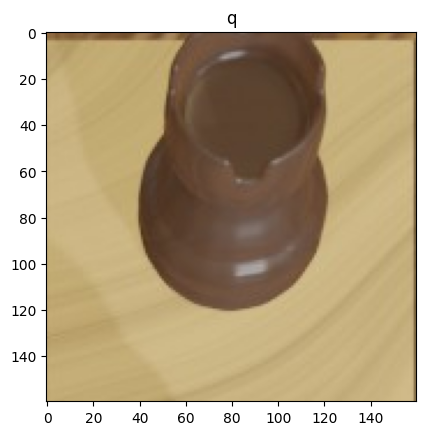

In [72]:
plt.title(image_data[4][1])
plt.imshow(image_data[4][0])